In [1]:
import nltk
import glob
import os
import re
import warnings; warnings.filterwarnings(action='once')

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [2]:
path = '../data/'
all_files = glob.glob(os.path.join(path, '*.csv'))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df = df[['company_name', 'full_complain']]

In [3]:
nltk.download('stopwords')

def pre_process(text):
    text = str(text)
    small_letters = re.findall(r'\b[A-zÀ-úü]+\b', text.lower())
    
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    removed_stop = [word for word in small_letters if word not in stop]
    
    clean_text = ' '.join(removed_stop)
    
    return clean_text

[nltk_data] Downloading package stopwords to /home/vitor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df['processed'] = [0] * df.shape[0]
df['processed'] = df[['full_complain']].applymap(pre_process)
df.shape

(1039, 3)

# Analise Reclame Aqui (inclui Steam)

In [8]:
nltk.download('punkt')

reclamacoes = [complain for complain in df.processed]
texto= ' '.join(reclamacoes)
tokens = word_tokenize(texto, language='portuguese')

freq = FreqDist(tokens)

[nltk_data] Downloading package punkt to /home/vitor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
plt.rcParams.update({'font.size': 19})

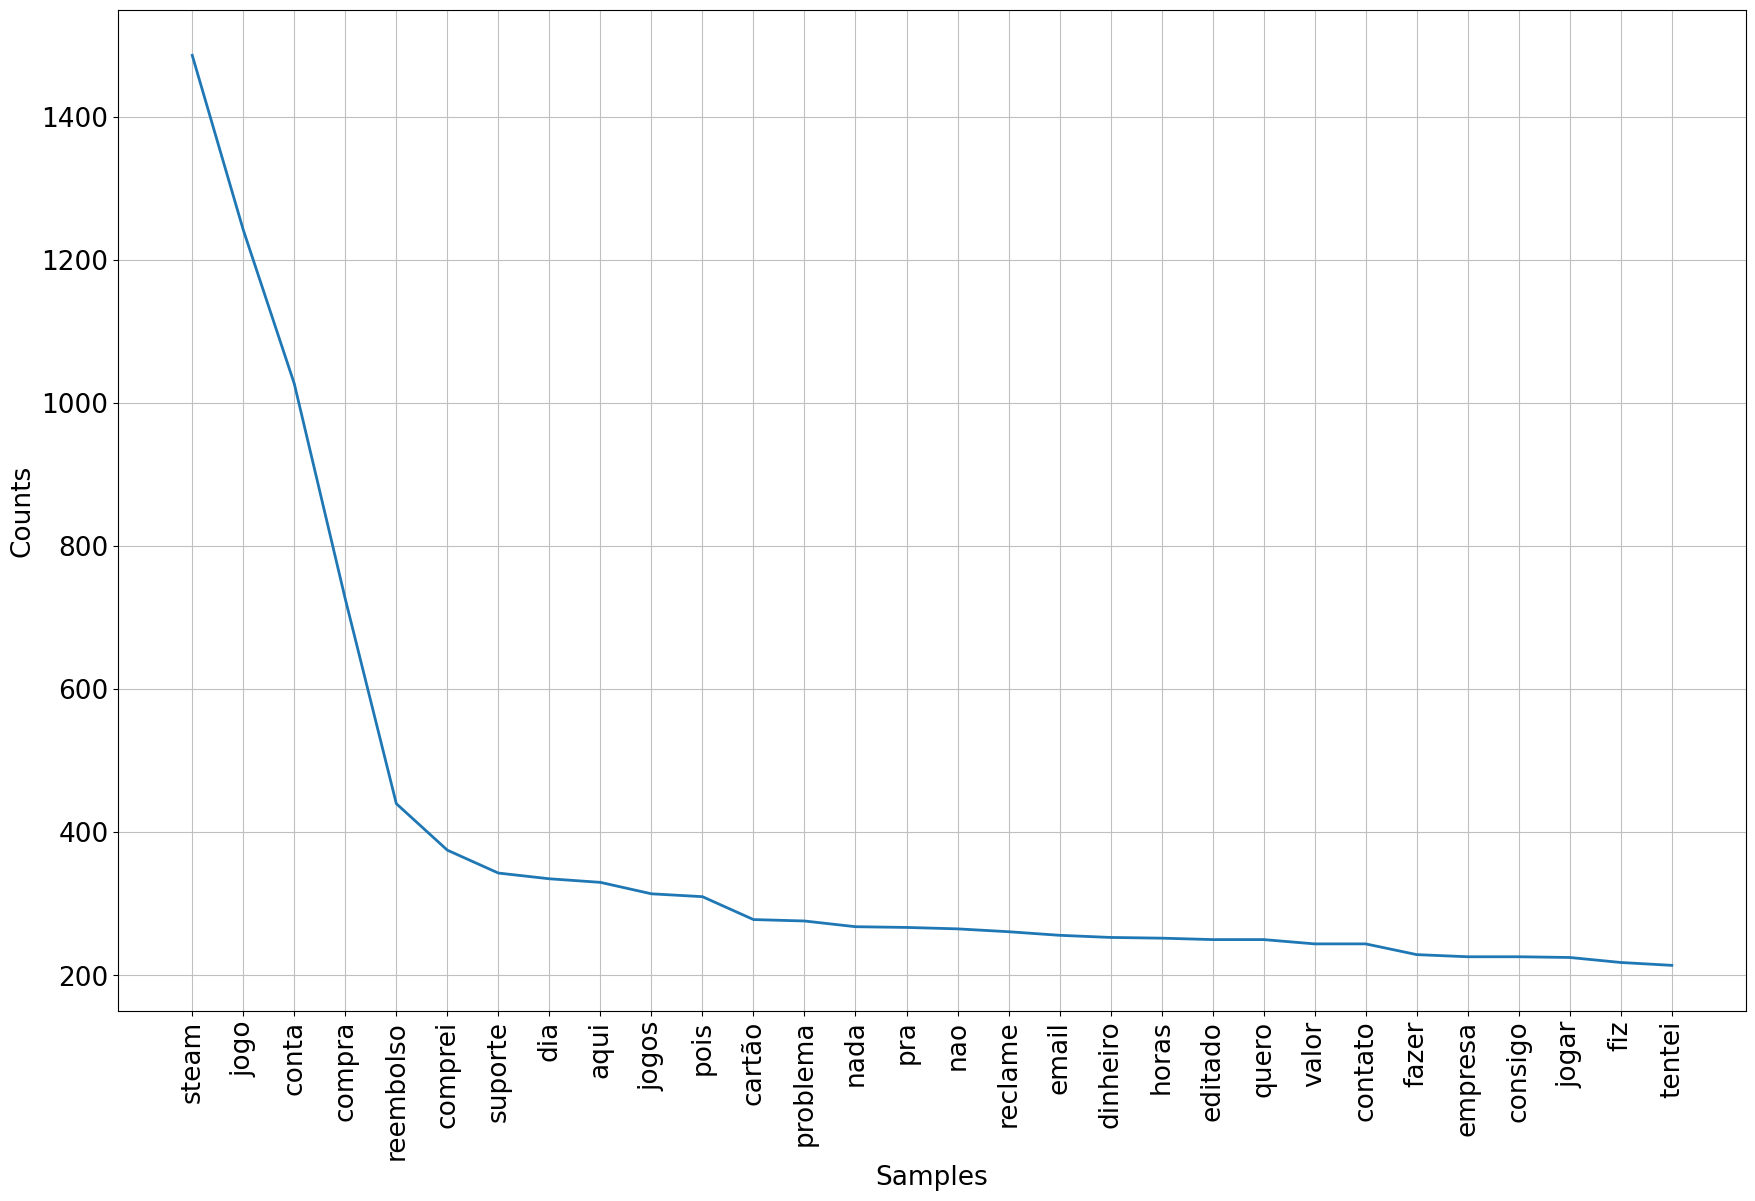

In [10]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
freq.plot(30);

In [12]:
round((freq['pix'] / df.shape[0]), 3) * 100

4.7

In [8]:
bigrams = nltk.bigrams(tokens)
big_freq = FreqDist(bigrams)

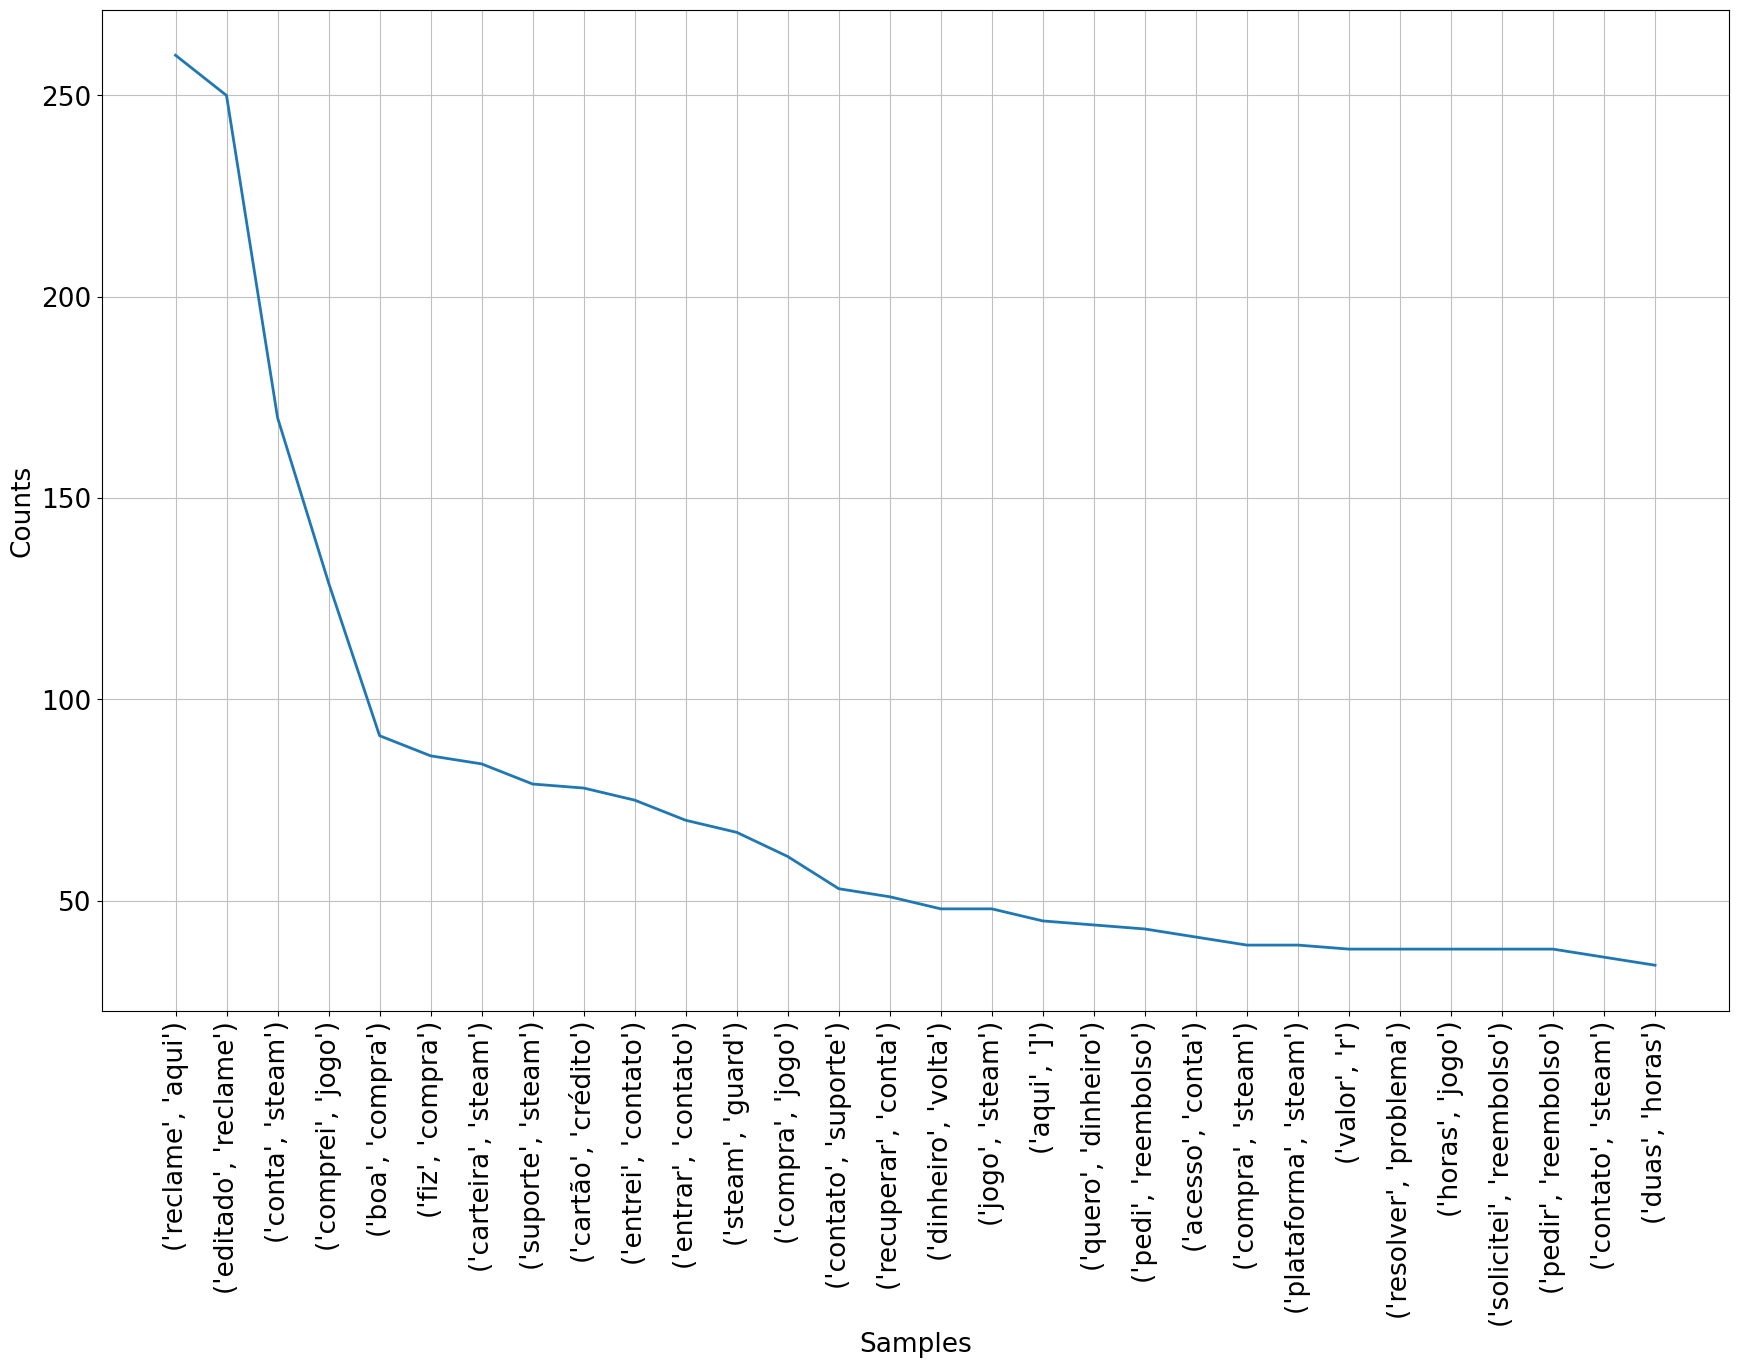

In [9]:
plt.figure(figsize=(21, 13))
plt.tight_layout()
big_freq.plot(30);

# Sobre sites de skins e cases

### CSMoney
    
  * 2.8M de acessos por mês, cerca de 170k provenientes do Brasil
  * Não possui PIX
      1. Principal forma de pagamento é cartão de crédito
      2. Possui Paypal e Neteller integrados
      3. No Brasil oferece boleto
 

### Skinbaron

  * 1M de acessos por mês, cerca de 50k provenientes do Brasil
  * Não possui PIX
      1. Único método oferecido ao Brasil é cartão de crédito

### Key-drop

  * 4.5M de acessos por mês, 400k provenientes do Brasil
  * Integrado com G2A e Paymentwall
      1. G2A integra PIX por meio da PagSeguro, além de Paypal, Skrill, Neteller e Boleto
      2. Paymentwall integra PIX por meio do MercadoPago, além de boleto

### GGdrop
  
  * 360k de acessos por mês, 70k provenientes do Brasil
  * Oferece PIX através da Unlimint
      1. No Brasil ainda oferece Picpay e Boleto
      2. Integrado com Paypal

### Hellcase

  * 1.6M de acessos por mês, 100k provenientes do Brasil
  * Oferece PIX através da Dlocal e G2A (PagSeguro)
      1. No Brasil ainda oferece Paypal e Boleto

### Neshastore
  
  * 180k de acessos por mês, 178k provenientes do Brasil
  * Oferece PIX através do MercadoPago
      1. No Brasil ainda oferece Boleto

### Proskins
  
  * 150k de acessos por mês, 145k provenientes do Brasil
  * Oferece PIX através do MercadoPago
      1. No Brasil ainda oferece Boleto

### Dmarket

  * 2.2M de acessos por mês, 175k provenientes do Brasil
  * Ofecere PIX através do Pagbrasil
      1. No Brasil ainda oferece Boleto
      2. Integrado com Skrill e Neteller

### Bitskins
  
  * 800k de acessos por mês, 30k provenientes do Brasil
  * Oferece PIX através do G2A (PagSeguro)

### Skincashier
  
  * 190K de acessos por mês, 12k provenientes do Brasil
  * Não oferece PIX
      1. No Brasil somente oferece Paypal e cartão de crédito

### Tradeit.gg

  * 1M de acessos por mês, 30k provenientes do Brasil
  * Não oferece PIX
      1. No Brasil somente ofecere cartão de crédito